In [1]:
import sys
import os
os.sys.path.append("/Users/itinawi/Library/Python/2.7/lib/python/site-packages")
# import the necessary packages
import cv2
import numpy as np
from PIL import Image, ImageFilter
import math

(1200, 1600, 3)


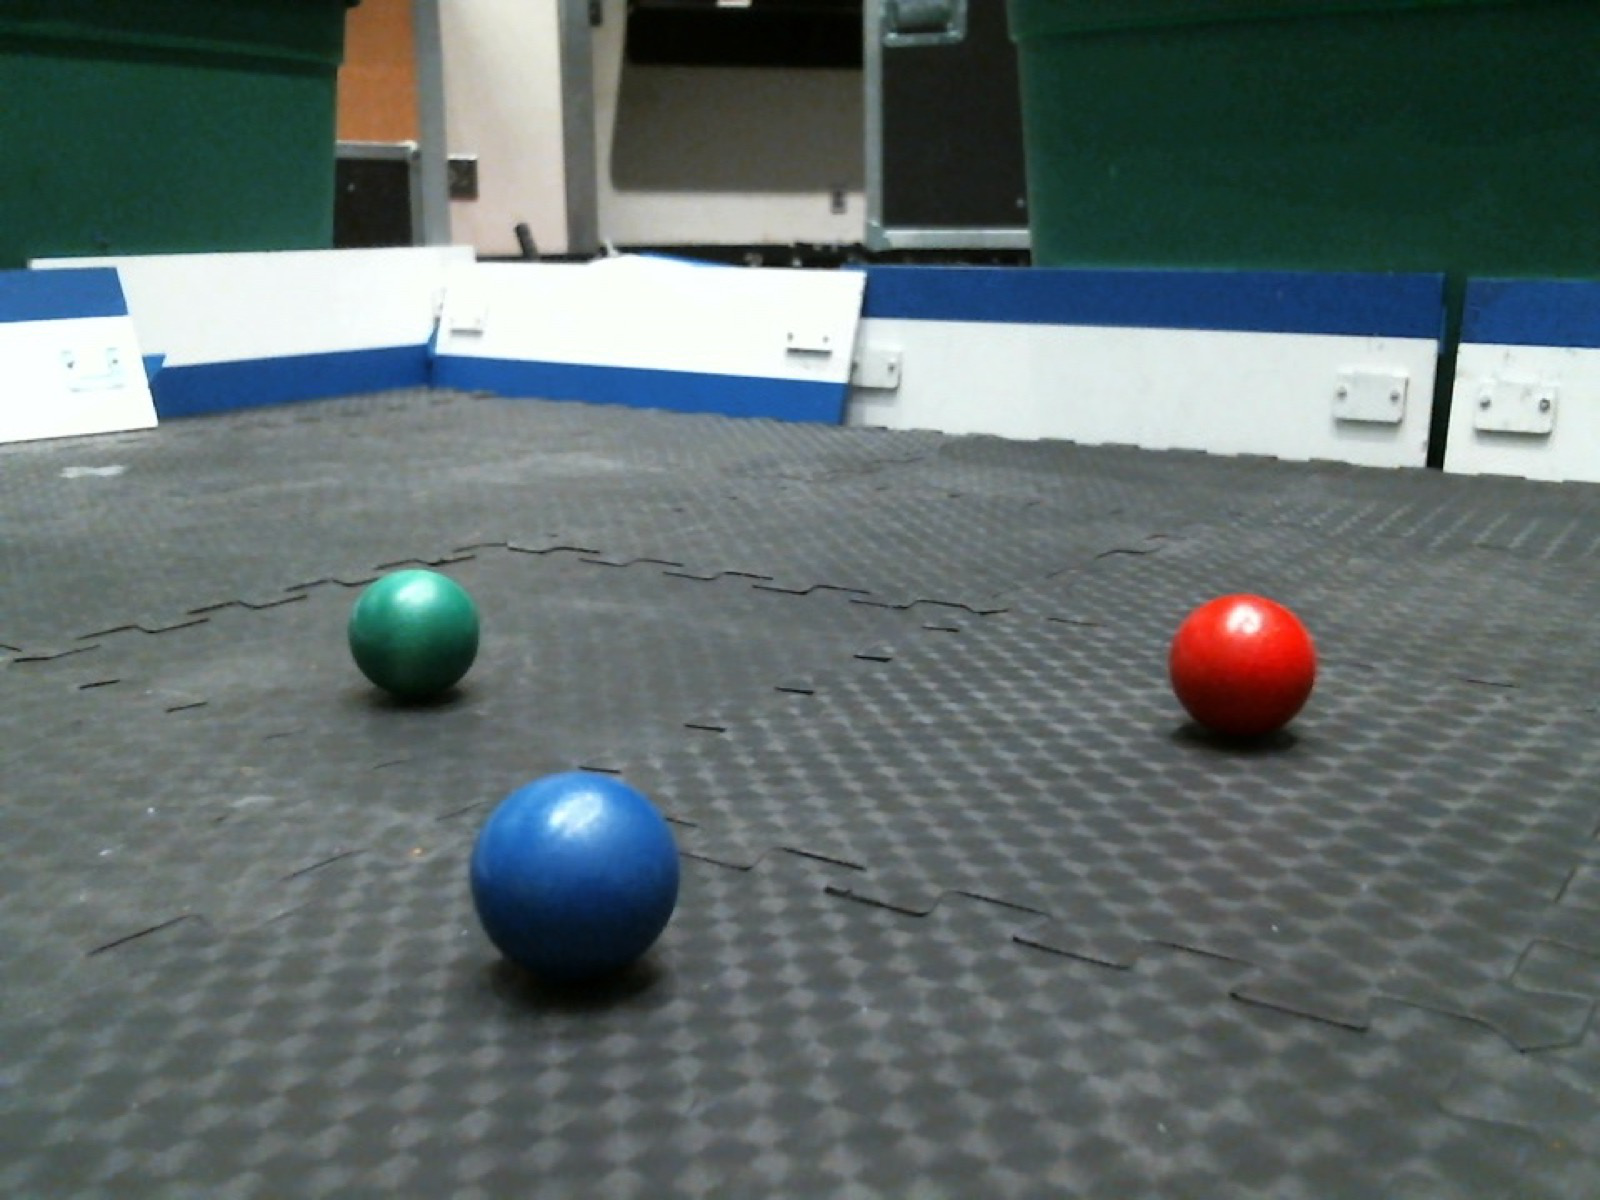

In [2]:
#raw_img = Image.open("/home/maslab/opencv/old_scripts/red_image.png")
raw_img = Image.open("/Users/itinawi/maslab/team-1/opencv/images/arena/bgr.jpg")
img = np.array(raw_img)
print img.shape
Image.fromarray(np.array(raw_img))

248.935625
255.0


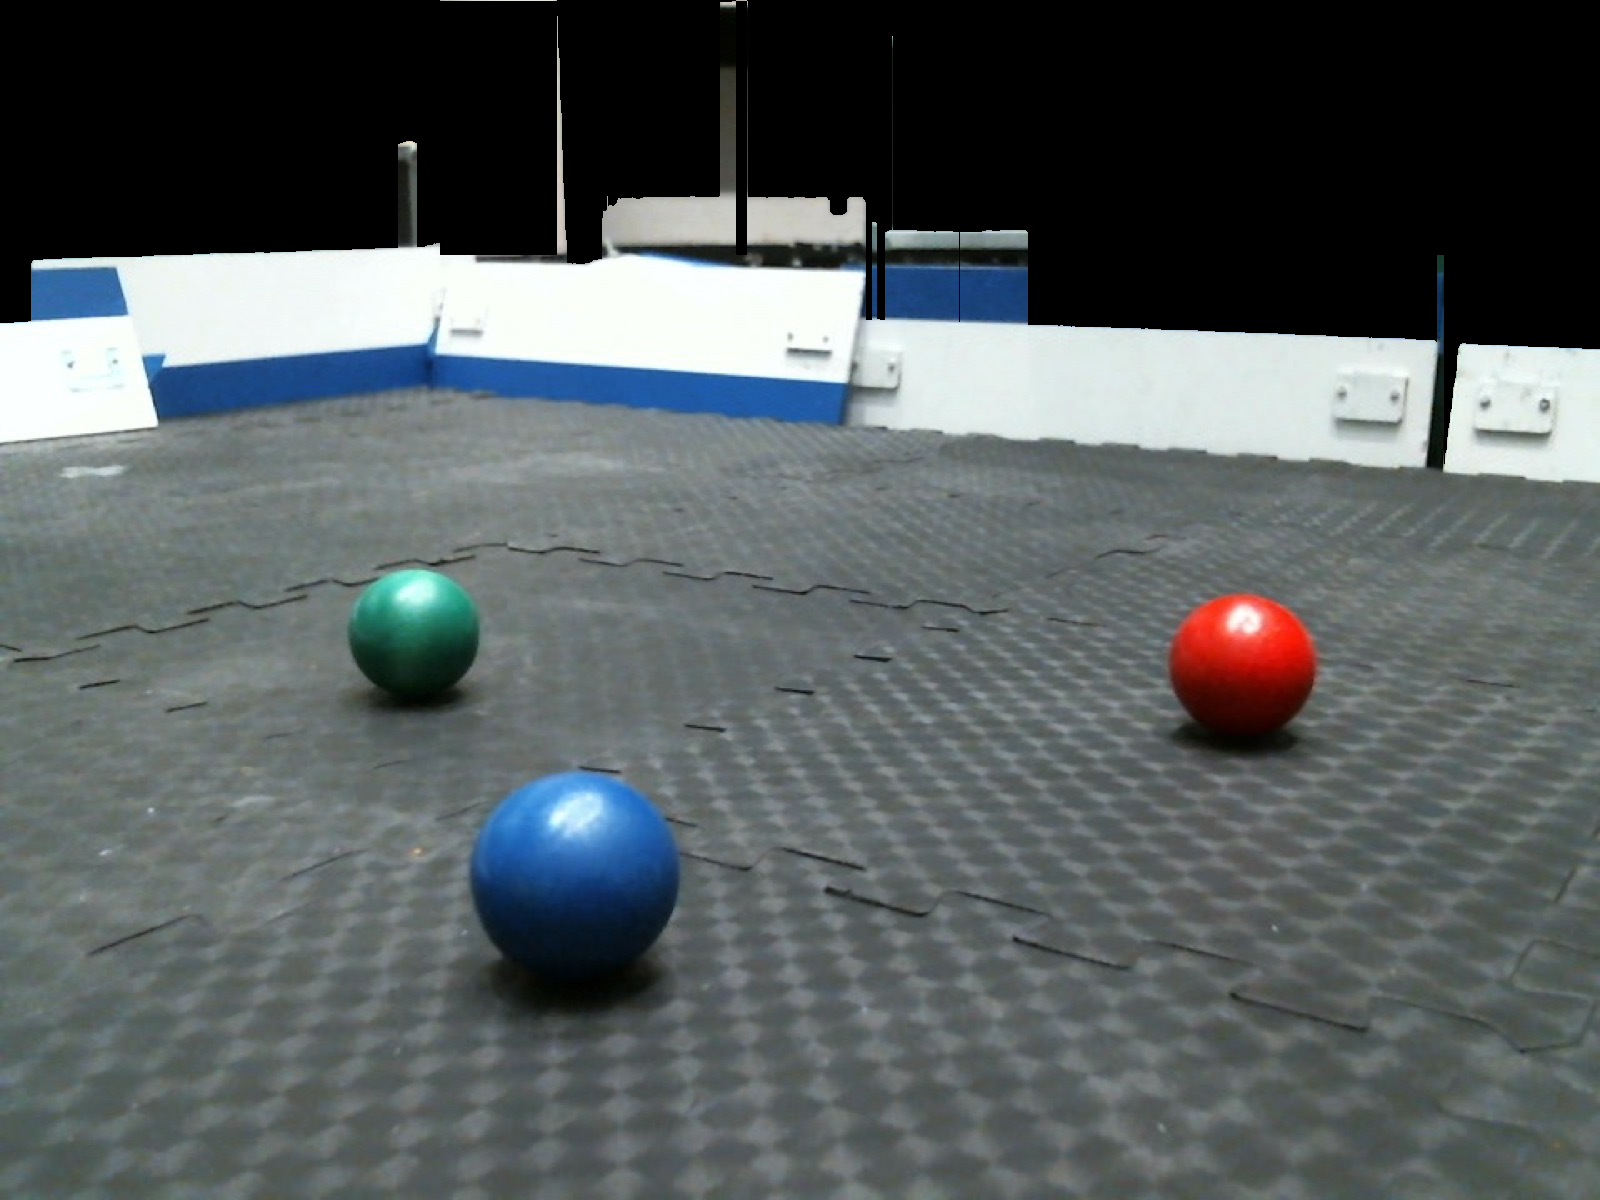

In [3]:
mask = (img[:,:,2] > 160) & (img[:,:,1] > 160) & (img[:,:,0] > 160)
new_im_arr = np.zeros(mask.shape)

wall_filter_mask = np.zeros(mask.shape)

# loop through the image column by column, look for the first white
# pixel, and blank everything before that
break_point = np.zeros(mask.shape[1])
for j in range(mask.shape[1]): # cols
    for i in range(mask.shape[0]): # rows
        if not mask[i][j]:
            wall_filter_mask[i][j] = True
        else:
            break_point[j] = i
            break
print np.mean(break_point)
print np.median(break_point)
filter_y = int(math.floor(np.median(break_point)))

bad_cols = []
for i in range(len(break_point)):
    elem = break_point[i]
    if elem > mask.shape[0]/2 or elem == 0:
        break_point[i] = filter_y
        bad_cols.append(i)

for j in bad_cols:
    for i in range(1, filter_y):
        wall_filter_mask[i][j] = True
    for i in range(filter_y, mask.shape[0]):
        wall_filter_mask[i][j] = False

# uncomment if you want to view the image
np.place(img[:,:,0], wall_filter_mask, 0)
np.place(img[:,:,1], wall_filter_mask, 0)
np.place(img[:,:,2], wall_filter_mask, 0)
Image.fromarray(img.astype(np.uint8))

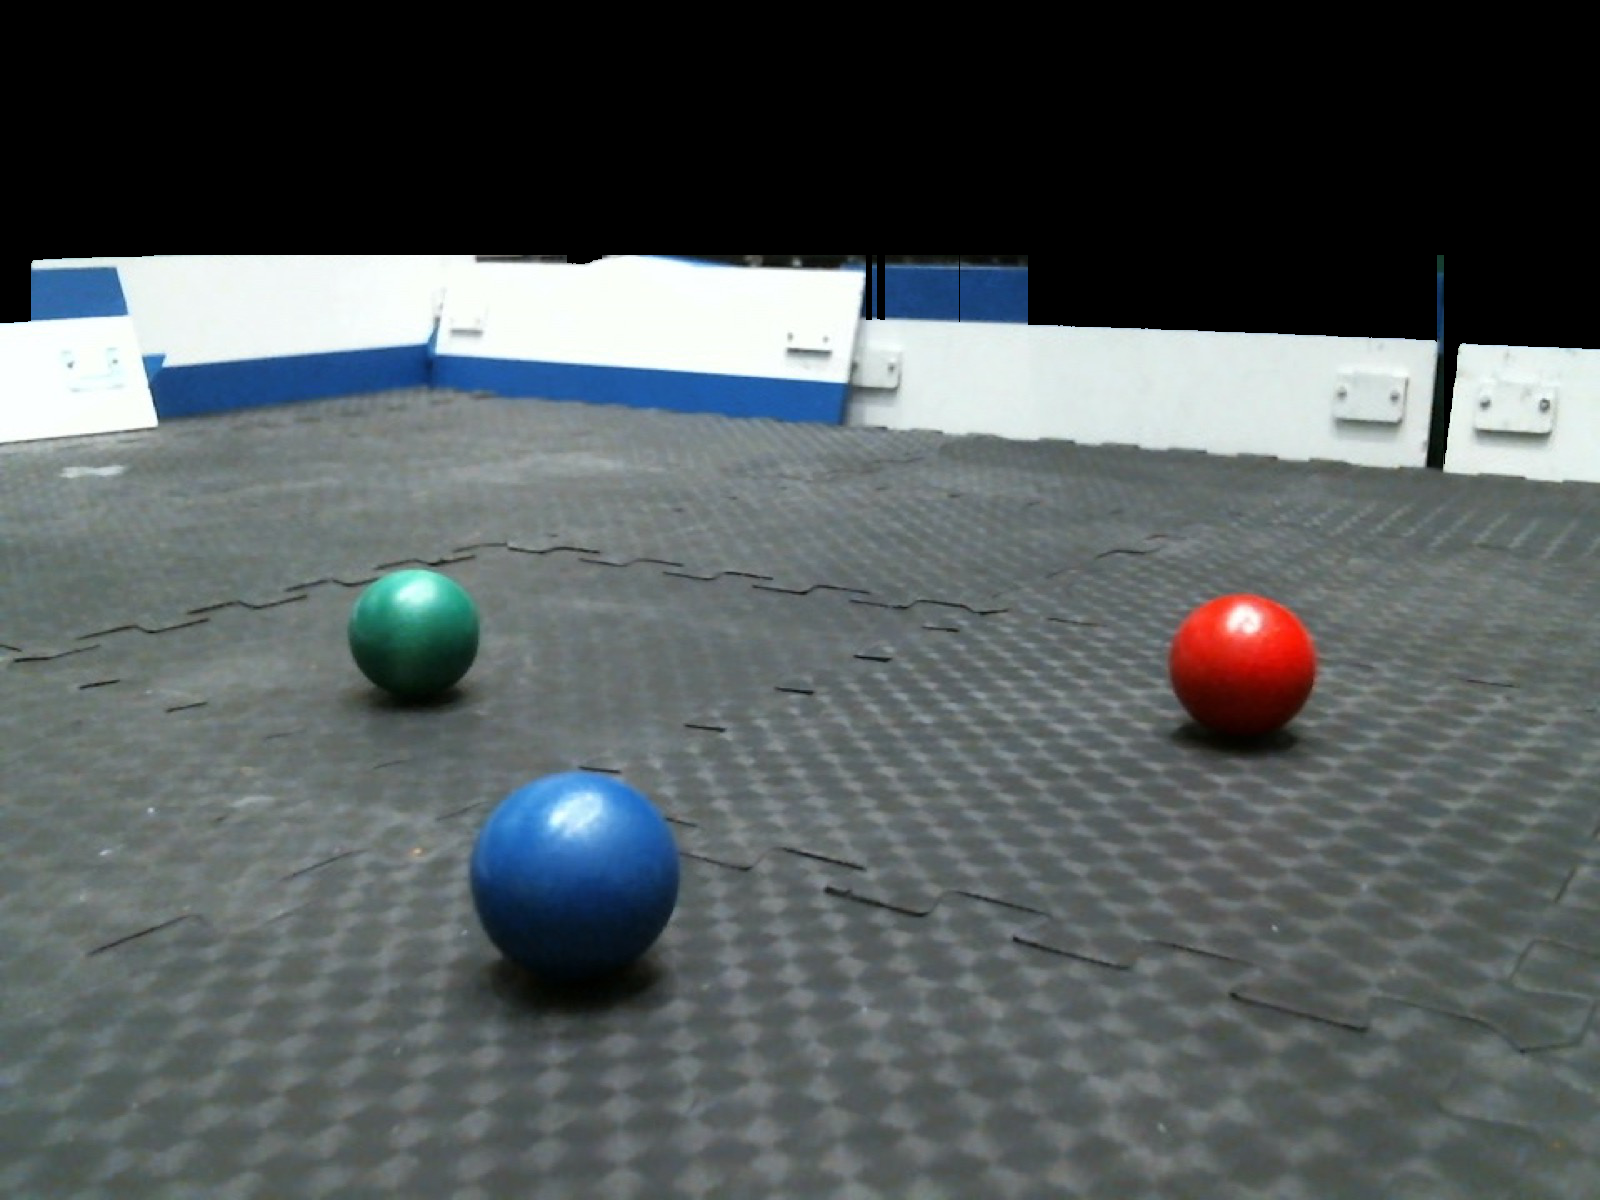

In [4]:
# filter_y = int(math.floor(np.median(break_point)))
for j in range(mask.shape[1]):
    for i in range(filter_y):
        wall_filter_mask[i][j] = True
np.place(img[:,:,0], wall_filter_mask, 0)
np.place(img[:,:,1], wall_filter_mask, 0)
np.place(img[:,:,2], wall_filter_mask, 0)
Image.fromarray(img.astype(np.uint8))